In [12]:
import sys
import pdb
import importlib
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
from cftime import DatetimeNoLeap as date
from matplotlib.dates import DateFormatter

plt.rcParams.update({
    'font.size'       : 14,   # Base font size
    'axes.labelsize'  : 14,   # Axis labels
    'xtick.labelsize' : 12,   # X-axis tick labels
    'ytick.labelsize' : 12,   # Y-axis tick labels
    'legend.fontsize' : 12,   # Legend font size
    'figure.titlesize': 16    # Figure title size
})
plt.ioff()

sys.path.insert(1, '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC')
import plotting_utils as putil
import compute_ensemble_stats as ces
importlib.reload(putil)
importlib.reload(ces)

<module 'compute_ensemble_stats' from '/global/homes/j/jhollo/repos/climate_analysis/CLDERA/TEM/limvar_analysis_NERSC/compute_ensemble_stats.py'>

In [13]:
importlib.reload(putil)
fix = putil.adjust_10daily_integrated_tendency
sigargs = {'lw':10, 'alpha':0.25}
#sigmode = 'coherence'
sigmode = 'pvalue'
pthresh, cthresh = 0.05, 0.75

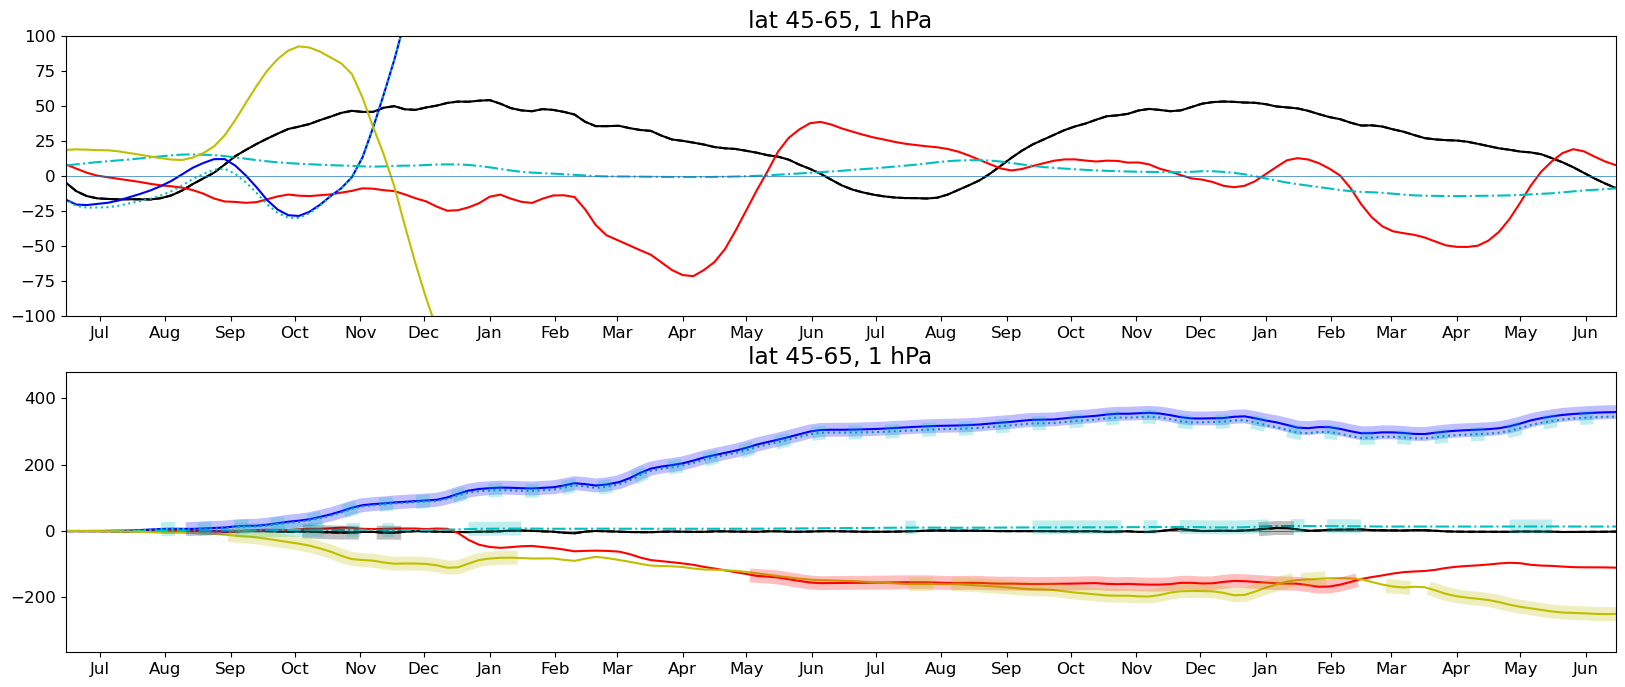

In [14]:
latmin, latmax = 45, 65
pres = 1

# ----- get tendencies
utend       = putil.get_daily_variable('UTEND', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendepfd   = putil.get_daily_variable('utendepfd', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendresvel = putil.get_daily_variable('UTRESVEL', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendvtem   = putil.get_daily_variable('utendvtem', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendwtem   = putil.get_daily_variable('utendwtem', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utenddiff   = putil.get_daily_variable('UTDIFF', latmin=latmin, latmax=latmax, skip_nosrctag=True)
# ----- get integrated tendencies
utendint       = putil.get_daily_variable('UTEND_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendepfdint   = putil.get_daily_variable('UTEPFD_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendresvelint = putil.get_daily_variable('UTRESVEL_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendvtemint   = putil.get_daily_variable('UTVTEM_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendwtemint   = putil.get_daily_variable('UTWTEM_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utenddiffint   = putil.get_daily_variable('UTDIFF_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
u              = putil.get_daily_variable('U', latmin=latmin, latmax=latmax, skip_nosrctag=True)

# ----- choose pressure level for analysis, get coords
parg = {'plev':pres, 'method':'nearest'}
time = putil.to_datetime(u['cfmean'].time)

# ----- make figure
fig  = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# ----- plot wind, integrated tendencies
uu     = u['cfmean'].sel(**parg)
uu0    = uu.isel(time=0)
ut     = utendint['cfmean'].sel(**parg)
utepfd = fix(uu, utendepfdint['cfmean'].sel(**parg))
utrv   = fix(uu, utendresvelint['cfmean'].sel(**parg))
utv    = fix(uu, utendvtemint['cfmean'].sel(**parg))
utw    = fix(uu, utendwtemint['cfmean'].sel(**parg))
utdf   = fix(uu, utenddiffint['cfmean'].sel(**parg))
# --- plot
ax1.plot(time, uu, '--k')
ax1.plot(time, ut, '-k')
ax1.plot(time, utepfd, '-r')
ax1.plot(time, utrv, '-b')
ax1.plot(time, utv, ':c')
ax1.plot(time, utw, '-.c')
ax1.plot(time, utdf, '-y')
# -- format
putil.season_timeticks(ax1, time, 'month')
ax1.axhline(y=0, lw=0.5)
ax2.axhline(y=0, lw=0.5)

# ----- plot wind impact, integrated tendency impact
uui     = u['impact'].sel(**parg)
uui0    = uui.isel(time=0)
uti     = utendint['impact'].sel(**parg)
utepfdi = fix(uui, utendepfdint['impact'].sel(**parg))
utvi    = fix(uui, utendvtemint['impact'].sel(**parg))
utwi    = fix(uui, utendwtemint['impact'].sel(**parg))
utrvi   = fix(uui, utendresvelint['impact'].sel(**parg))
utdfi   = fix(uui, utenddiffint['impact'].sel(**parg))
# -- nan insignificant values
if(sigmode == 'pvalue'):
    uti_filt     = uti.where(utendint['pval'].sel(**parg) < pthresh)
    utepfdi_filt = utepfdi.where(utendepfdint['pval'].sel(**parg) < pthresh)
    utrvi_filt   = utrvi.where(utendresvelint['pval'].sel(**parg) < pthresh)
    utvi_filt    = utvi.where(utendvtemint['pval'].sel(**parg) < pthresh)
    utwi_filt    = utwi.where(utendwtemint['pval'].sel(**parg) < pthresh)
    utdfi_filt   = utdfi.where(utenddiffint['pval'].sel(**parg) < pthresh)
if(sigmode == 'coherence'):
    uti_filt     = uti.where(utendint['coherence'].sel(**parg) > cthresh)
    utepfdi_filt = utepfdi.where(utendepfdint['coherence'].sel(**parg) > cthresh)
    utrvi_filt   = utrvi.where(utendresvelint['coherence'].sel(**parg) > cthresh)
    utvi_filt    = utvi.where(utendvtemint['coherence'].sel(**parg) > cthresh)
    utwi_filt    = utwi.where(utendwtemint['coherence'].sel(**parg) > cthresh)
    utdfi_filt   = utdfi.where(utenddiffint['coherence'].sel(**parg) > cthresh)
    
# --- plot
ax2.plot(time, uui, '--k')
ax2.plot(time, uti, '-k')
ax2.plot(time, utepfdi, '-r')
ax2.plot(time, utrvi, '-b')
ax2.plot(time, utvi, ':c')
ax2.plot(time, utwi, '-.c')
ax2.plot(time, utdfi, '-y')
# --- plot significance
ax2.plot(time, uti_filt, '-k', **sigargs)
ax2.plot(time, utepfdi_filt, '-r', **sigargs)
ax2.plot(time, utrvi_filt, '-b', **sigargs)
ax2.plot(time, utvi_filt, ':c', **sigargs)
ax2.plot(time, utwi_filt, '-.c', **sigargs)
ax2.plot(time, utdfi_filt, '-y', **sigargs)
# -- format
putil.season_timeticks(ax2, time, 'month')

ax1.set_ylim([-100, 100])
ax1.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax2.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax1.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
ax2.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
plt.show()

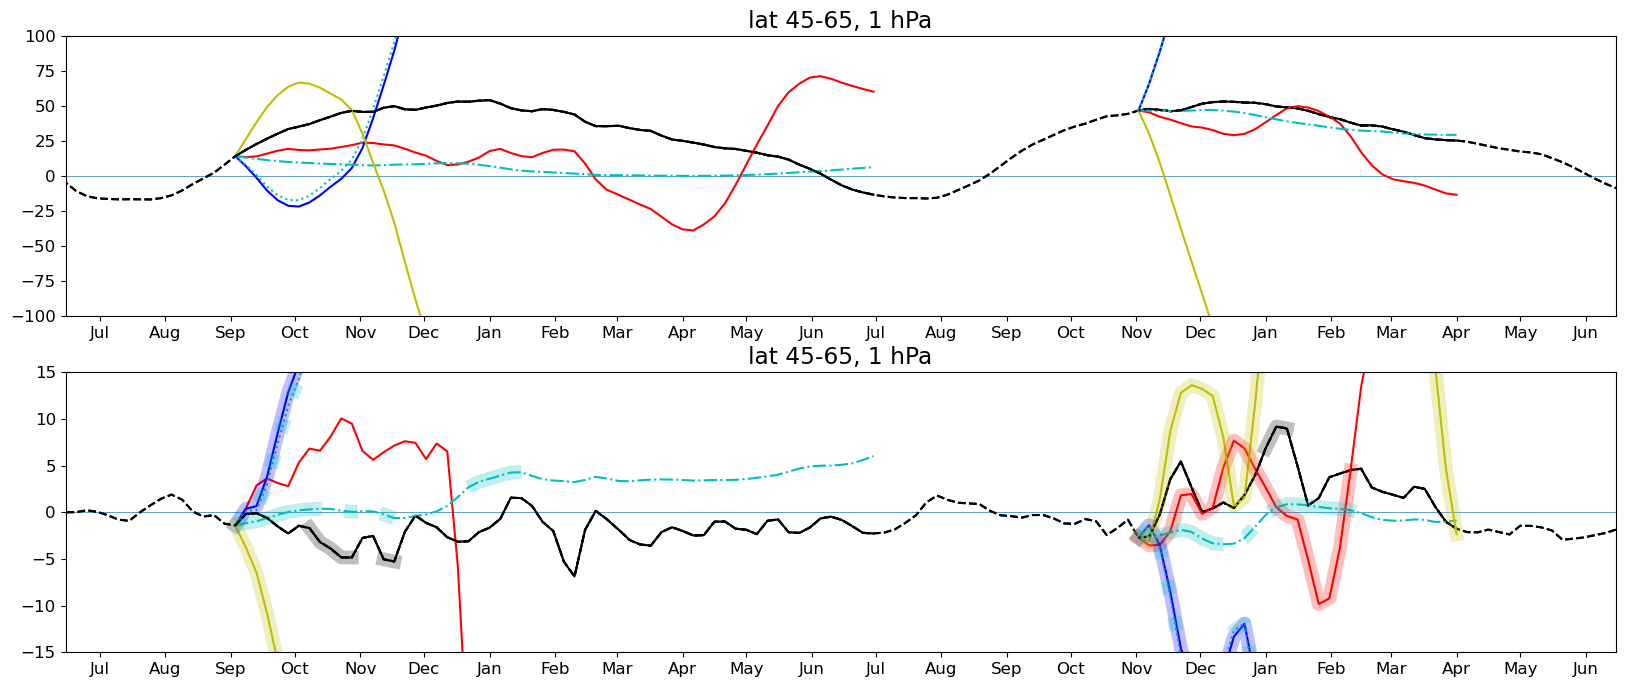

In [15]:
#  ---------------- same thing, but now for specific initialization times...
latmin, latmax = 45, 65
pres=1
stt = putil.shift_integrated_tendency
importlib.reload(putil)

# ----- choose pressure level for analysis, get coords
parg = {'plev':pres, 'method':'nearest'}
time = putil.to_datetime(u['cfmean'].time)
icd  = date(1991, 7, 1)
end  = date(1992, 6, 1)
dates = [[date(1991, 9, 1), date(1992, 7, 1)], 
         [date(1992, 11, 1), date(1993, 4, 1)]]

# ----- make figure
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
putil.season_timeticks(ax1, time, 'month')

ax1.axhline(y=0, lw=0.5)
ax2.axhline(y=0, lw=0.5)
putil.season_timeticks(ax2, time, 'month')

for daterange in dates:
    icd, end = daterange[0], daterange[1]
    
    # ----- plot wind, integrated tendencies
    uu     = u['cfmean'].sel(**parg)
    uu0    = uu.sel(time=slice(icd, end)).isel(time=0)
    ut     = stt(uu, utendint['cfmean'].sel(**parg), icd, end)
    utepfd = stt(uu, utendepfdint['cfmean'].sel(**parg), icd, end)
    utrv   = stt(uu, utendresvelint['cfmean'].sel(**parg), icd, end)
    utv    = stt(uu, utendvtemint['cfmean'].sel(**parg), icd, end)
    utw    = stt(uu, utendwtemint['cfmean'].sel(**parg), icd, end)
    utdf   = stt(uu, utenddiffint['cfmean'].sel(**parg), icd, end)
    # -- plot
    ax1.plot(time, uu, '--k')
    ax1.plot(ut.time, ut, '-k')
    ax1.plot(ut.time, utepfd, '-r')
    ax1.plot(ut.time, utrv, '-b')
    ax1.plot(ut.time, utv, ':c')
    ax1.plot(ut.time, utw, '-.c')
    ax1.plot(ut.time, utdf, '-y')
    ax1.plot(ut.time, utdf+utrv+utepfd-2*uu0, ':k')

    
    # ----- plot wind impact, integrated tendency impact
    uui     = u['impact'].sel(**parg)
    uui0    = uui.sel(time=slice(icd, end)).isel(time=0)
    uti     = stt(uui, utendint['impact'].sel(**parg), icd, end)
    utepfdi = stt(uui, utendepfdint['impact'].sel(**parg), icd, end)
    utrvi   = stt(uui, utendresvelint['impact'].sel(**parg), icd, end)
    utvi    = stt(uui, utendvtemint['impact'].sel(**parg), icd, end)
    utwi    = stt(uui, utendwtemint['impact'].sel(**parg), icd, end)
    utdfi   = stt(uui, utenddiffint['impact'].sel(**parg), icd, end)
    # -- nan insignificant values
    if(sigmode == 'pvalue'):
        uti_filt     = uti.where(utendint['pval'].sel(**parg) < pthresh)
        utepfdi_filt = utepfdi.where(utendepfdint['pval'].sel(**parg) < pthresh)
        utrvi_filt   = utrvi.where(utendresvelint['pval'].sel(**parg) < pthresh)
        utvi_filt    = utvi.where(utendvtemint['pval'].sel(**parg) < pthresh)
        utwi_filt    = utwi.where(utendwtemint['pval'].sel(**parg) < pthresh)
        utdfi_filt   = utdfi.where(utenddiffint['pval'].sel(**parg) < pthresh)
    if(sigmode == 'coherence'):
        uti_filt     = uti.where(utendint['coherence'].sel(**parg) > cthresh)
        utepfdi_filt = utepfdi.where(utendepfdint['coherence'].sel(**parg) > cthresh)
        utrvi_filt   = utrvi.where(utendresvelint['coherence'].sel(**parg) > cthresh)
        utvi_filt    = utvi.where(utendvtemint['coherence'].sel(**parg) > cthresh)
        utwi_filt    = utwi.where(utendwtemint['coherence'].sel(**parg) > cthresh)
        utdfi_filt   = utdfi.where(utenddiffint['coherence'].sel(**parg) > cthresh)
    # -- plot
    ax2.plot(time, uui, '--k')
    ax2.plot(ut.time, uti, '-k')
    ax2.plot(ut.time, utepfdi, '-r')
    ax2.plot(ut.time, utrvi, '-b')
    ax2.plot(ut.time, utvi, ':c')
    ax2.plot(ut.time, utwi, '-.c')
    ax2.plot(ut.time, utdfi, '-y')
    # --- plot significance
    ax2.plot(ut.time, uti_filt, '-k', **sigargs)
    ax2.plot(ut.time, utepfdi_filt, '-r', **sigargs)
    ax2.plot(ut.time, utrvi_filt, '-b', **sigargs)
    ax2.plot(ut.time, utvi_filt, ':c', **sigargs)
    ax2.plot(ut.time, utwi_filt, '-.c', **sigargs)
    ax2.plot(ut.time, utdfi_filt, '-y', **sigargs)
    # -- format
    ax2.plot(ut.time, utdfi+utrvi+utepfdi-2*uui0, ':k')
    
ax1.set_ylim([-100, 100])
ax2.set_ylim([-15, 15])
ax1.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax2.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax1.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
ax2.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))

plt.show()

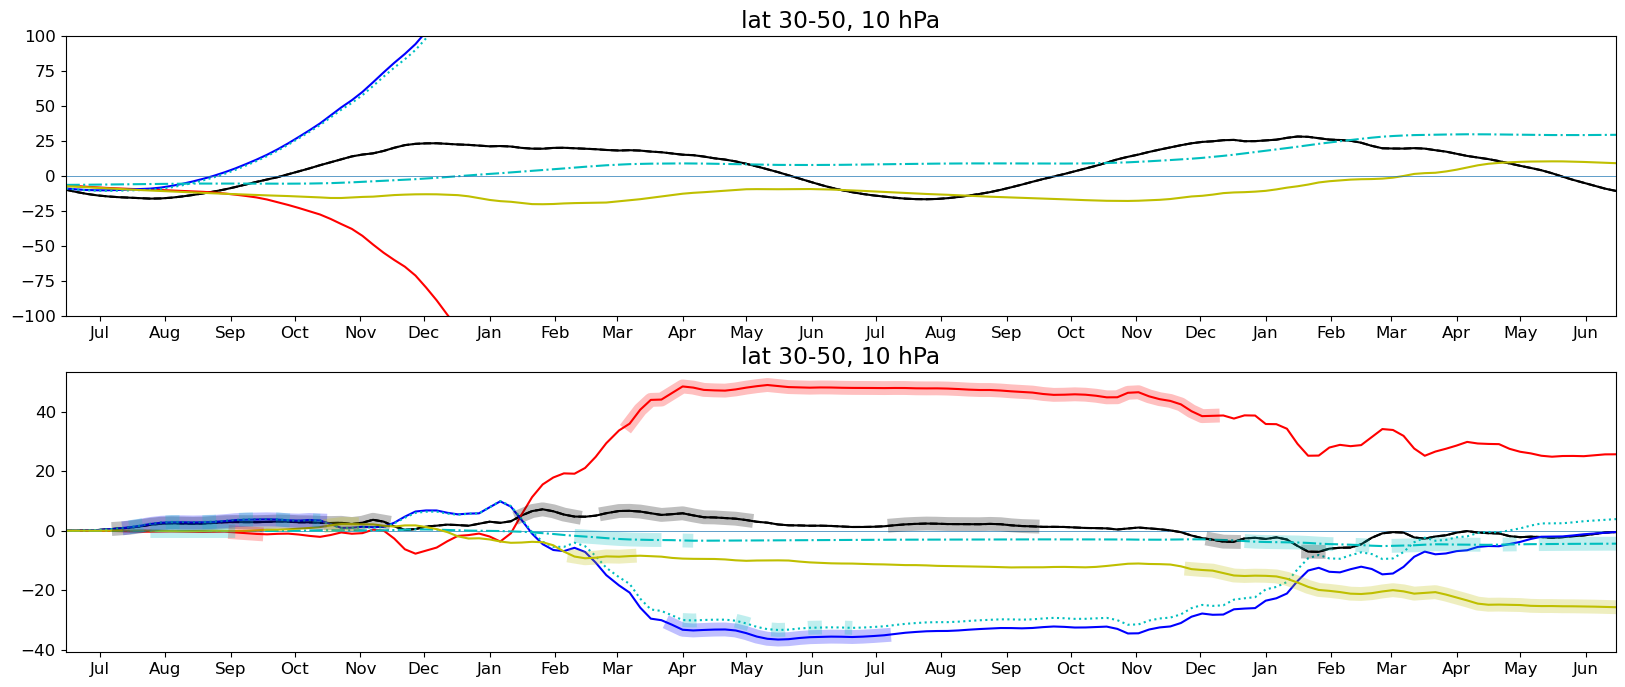

In [16]:
latmin, latmax = 30, 50
pres=10

# ----- get tendencies
utend       = putil.get_daily_variable('UTEND', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendepfd   = putil.get_daily_variable('utendepfd', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendresvel = putil.get_daily_variable('UTRESVEL', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendvtem   = putil.get_daily_variable('utendvtem', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendwtem   = putil.get_daily_variable('utendwtem', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utenddiff   = putil.get_daily_variable('UTDIFF', latmin=latmin, latmax=latmax, skip_nosrctag=True)
# ----- get integrated tendencies
utendint       = putil.get_daily_variable('UTEND_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendepfdint   = putil.get_daily_variable('UTEPFD_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendresvelint = putil.get_daily_variable('UTRESVEL_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendvtemint   = putil.get_daily_variable('UTVTEM_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendwtemint   = putil.get_daily_variable('UTWTEM_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utenddiffint   = putil.get_daily_variable('UTDIFF_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
u              = putil.get_daily_variable('U', latmin=latmin, latmax=latmax, skip_nosrctag=True)

# ----- choose pressure level for analysis, get coords
parg = {'plev':pres, 'method':'nearest'}
time = putil.to_datetime(u['cfmean'].time)

# ----- make figure
fig  = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# ----- plot wind, integrated tendencies
uu     = u['cfmean'].sel(**parg)
uu0    = uu.isel(time=0)
ut     = utendint['cfmean'].sel(**parg)
utepfd = fix(uu, utendepfdint['cfmean'].sel(**parg))
utrv   = fix(uu, utendresvelint['cfmean'].sel(**parg))
utv    = fix(uu, utendvtemint['cfmean'].sel(**parg))
utw    = fix(uu, utendwtemint['cfmean'].sel(**parg))
utdf   = fix(uu, utenddiffint['cfmean'].sel(**parg))
# --- plot
ax1.plot(time, uu, '--k')
ax1.plot(time, ut, '-k')
ax1.plot(time, utepfd, '-r')
ax1.plot(time, utrv, '-b')
ax1.plot(time, utv, ':c')
ax1.plot(time, utw, '-.c')
ax1.plot(time, utdf, '-y')
# -- format
putil.season_timeticks(ax1, time, 'month')
ax1.axhline(y=0, lw=0.5)
ax2.axhline(y=0, lw=0.5)

# ----- plot wind impact, integrated tendency impact
uui     = u['impact'].sel(**parg)
uui0    = uui.isel(time=0)
uti     = utendint['impact'].sel(**parg)
utepfdi = fix(uui, utendepfdint['impact'].sel(**parg))
utvi    = fix(uui, utendvtemint['impact'].sel(**parg))
utwi    = fix(uui, utendwtemint['impact'].sel(**parg))
utrvi   = fix(uui, utendresvelint['impact'].sel(**parg))
utdfi   = fix(uui, utenddiffint['impact'].sel(**parg))
# -- nan insignificant values
if(sigmode == 'pvalue'):
    uti_filt     = uti.where(utendint['pval'].sel(**parg) < pthresh)
    utepfdi_filt = utepfdi.where(utendepfdint['pval'].sel(**parg) < pthresh)
    utrvi_filt   = utrvi.where(utendresvelint['pval'].sel(**parg) < pthresh)
    utvi_filt    = utvi.where(utendvtemint['pval'].sel(**parg) < pthresh)
    utwi_filt    = utwi.where(utendwtemint['pval'].sel(**parg) < pthresh)
    utdfi_filt   = utdfi.where(utenddiffint['pval'].sel(**parg) < pthresh)
if(sigmode == 'coherence'):
    uti_filt     = uti.where(utendint['coherence'].sel(**parg) > cthresh)
    utepfdi_filt = utepfdi.where(utendepfdint['coherence'].sel(**parg) > cthresh)
    utrvi_filt   = utrvi.where(utendresvelint['coherence'].sel(**parg) > cthresh)
    utvi_filt    = utvi.where(utendvtemint['coherence'].sel(**parg) > cthresh)
    utwi_filt    = utwi.where(utendwtemint['coherence'].sel(**parg) > cthresh)
    utdfi_filt   = utdfi.where(utenddiffint['coherence'].sel(**parg) > cthresh)
    
# --- plot
ax2.plot(time, uui, '--k')
ax2.plot(time, uti, '-k')
ax2.plot(time, utepfdi, '-r')
ax2.plot(time, utrvi, '-b')
ax2.plot(time, utvi, ':c')
ax2.plot(time, utwi, '-.c')
ax2.plot(time, utdfi, '-y')
# --- plot significance
ax2.plot(time, uti_filt, '-k', **sigargs)
ax2.plot(time, utepfdi_filt, '-r', **sigargs)
ax2.plot(time, utrvi_filt, '-b', **sigargs)
ax2.plot(time, utvi_filt, ':c', **sigargs)
ax2.plot(time, utwi_filt, '-.c', **sigargs)
ax2.plot(time, utdfi_filt, '-y', **sigargs)
# -- format
putil.season_timeticks(ax2, time, 'month')

ax1.set_ylim([-100, 100])
ax1.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax2.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax1.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
ax2.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
plt.show()

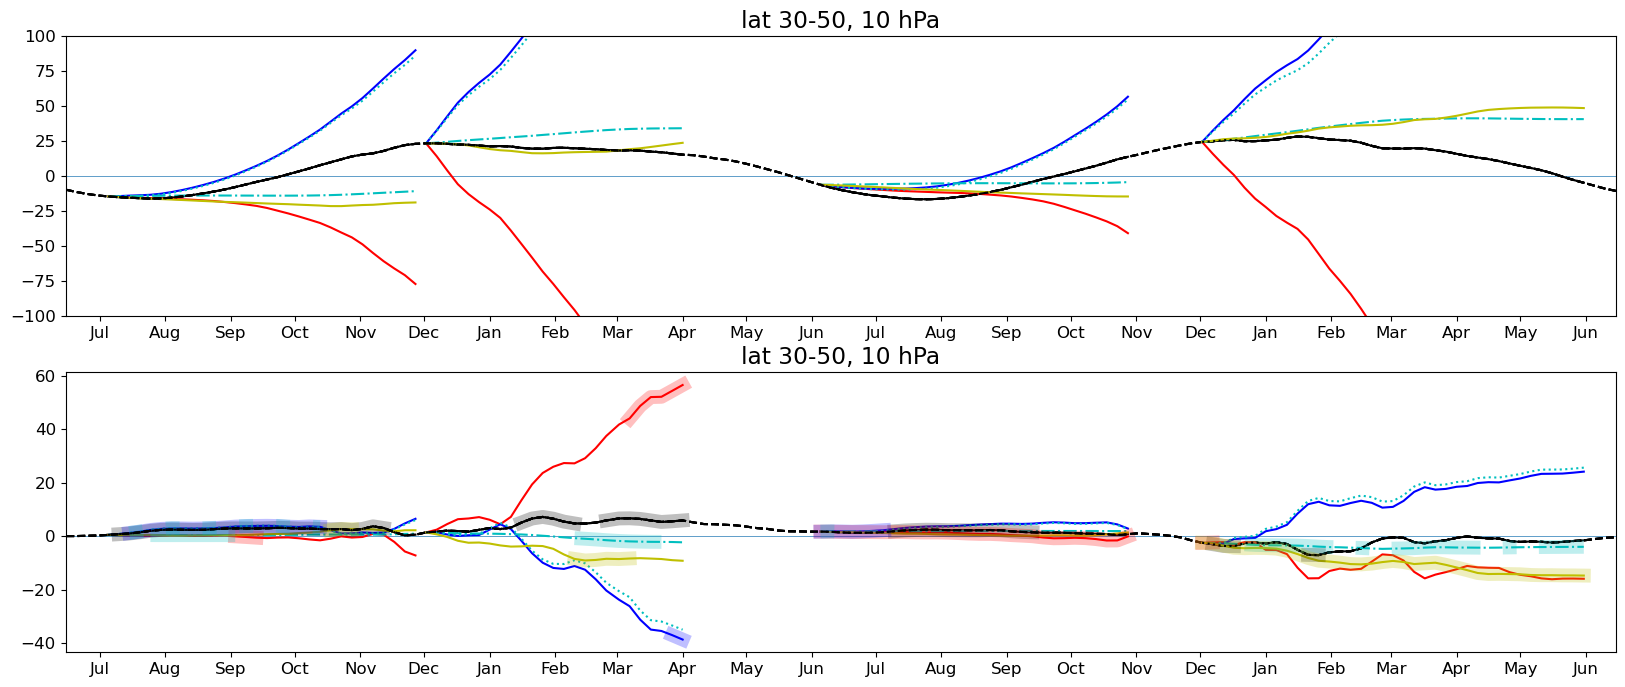

In [17]:
#  ---------------- same thing, but now for specific initialization times...
latmin, latmax = 30, 50
pres=10
stt = putil.shift_integrated_tendency
importlib.reload(putil)

# ----- choose pressure level for analysis, get coords
parg = {'plev':pres, 'method':'nearest'}
time = putil.to_datetime(u['cfmean'].time)
icd  = date(1991, 7, 1)
end  = date(1992, 6, 1)
dates = [[date(1991, 7, 1), date(1991, 12, 1)], 
         [date(1991, 12, 1), date(1992, 4, 1)], 
         [date(1992, 6, 1), date(1992, 11, 1)], 
         [date(1992, 12, 1), date(1993, 6, 1)]]

# ----- make figure
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
putil.season_timeticks(ax1, time, 'month')

ax1.axhline(y=0, lw=0.5)
ax2.axhline(y=0, lw=0.5)
putil.season_timeticks(ax2, time, 'month')

for daterange in dates:
    icd, end = daterange[0], daterange[1]
    
    # ----- plot wind, integrated tendencies
    uu     = u['cfmean'].sel(**parg)
    uu0    = uu.sel(time=slice(icd, end)).isel(time=0)
    ut     = stt(uu, utendint['cfmean'].sel(**parg), icd, end)
    utepfd = stt(uu, utendepfdint['cfmean'].sel(**parg), icd, end)
    utrv   = stt(uu, utendresvelint['cfmean'].sel(**parg), icd, end)
    utv    = stt(uu, utendvtemint['cfmean'].sel(**parg), icd, end)
    utw    = stt(uu, utendwtemint['cfmean'].sel(**parg), icd, end)
    utdf   = stt(uu, utenddiffint['cfmean'].sel(**parg), icd, end)
    # -- plot
    ax1.plot(time, uu, '--k')
    ax1.plot(ut.time, ut, '-k')
    ax1.plot(ut.time, utepfd, '-r')
    ax1.plot(ut.time, utrv, '-b')
    ax1.plot(ut.time, utv, ':c')
    ax1.plot(ut.time, utw, '-.c')
    ax1.plot(ut.time, utdf, '-y')
    ax1.plot(ut.time, utdf+utrv+utepfd-2*uu0, ':k')

    
    # ----- plot wind impact, integrated tendency impact
    uui     = u['impact'].sel(**parg)
    uui0    = uui.sel(time=slice(icd, end)).isel(time=0)
    uti     = stt(uui, utendint['impact'].sel(**parg), icd, end)
    utepfdi = stt(uui, utendepfdint['impact'].sel(**parg), icd, end)
    utrvi   = stt(uui, utendresvelint['impact'].sel(**parg), icd, end)
    utvi    = stt(uui, utendvtemint['impact'].sel(**parg), icd, end)
    utwi    = stt(uui, utendwtemint['impact'].sel(**parg), icd, end)
    utdfi   = stt(uui, utenddiffint['impact'].sel(**parg), icd, end)
    # -- nan insignificant values
    if(sigmode == 'pvalue'):
        uti_filt     = uti.where(utendint['pval'].sel(**parg) < pthresh)
        utepfdi_filt = utepfdi.where(utendepfdint['pval'].sel(**parg) < pthresh)
        utrvi_filt   = utrvi.where(utendresvelint['pval'].sel(**parg) < pthresh)
        utvi_filt    = utvi.where(utendvtemint['pval'].sel(**parg) < pthresh)
        utwi_filt    = utwi.where(utendwtemint['pval'].sel(**parg) < pthresh)
        utdfi_filt   = utdfi.where(utenddiffint['pval'].sel(**parg) < pthresh)
    if(sigmode == 'coherence'):
        uti_filt     = uti.where(utendint['coherence'].sel(**parg) > cthresh)
        utepfdi_filt = utepfdi.where(utendepfdint['coherence'].sel(**parg) > cthresh)
        utrvi_filt   = utrvi.where(utendresvelint['coherence'].sel(**parg) > cthresh)
        utvi_filt    = utvi.where(utendvtemint['coherence'].sel(**parg) > cthresh)
        utwi_filt    = utwi.where(utendwtemint['coherence'].sel(**parg) > cthresh)
        utdfi_filt   = utdfi.where(utenddiffint['coherence'].sel(**parg) > cthresh)
    # -- plot
    ax2.plot(time, uui, '--k')
    ax2.plot(ut.time, uti, '-k')
    ax2.plot(ut.time, utepfdi, '-r')
    ax2.plot(ut.time, utrvi, '-b')
    ax2.plot(ut.time, utvi, ':c')
    ax2.plot(ut.time, utwi, '-.c')
    ax2.plot(ut.time, utdfi, '-y')
    # --- plot significance
    ax2.plot(ut.time, uti_filt, '-k', **sigargs)
    ax2.plot(ut.time, utepfdi_filt, '-r', **sigargs)
    ax2.plot(ut.time, utrvi_filt, '-b', **sigargs)
    ax2.plot(ut.time, utvi_filt, ':c', **sigargs)
    ax2.plot(ut.time, utwi_filt, '-.c', **sigargs)
    ax2.plot(ut.time, utdfi_filt, '-y', **sigargs)
    # -- format
    ax2.plot(ut.time, utdfi+utrvi+utepfdi-2*uui0, ':k')
    
ax1.set_ylim([-100, 100])
ax1.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax2.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax1.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
ax2.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))

plt.show()

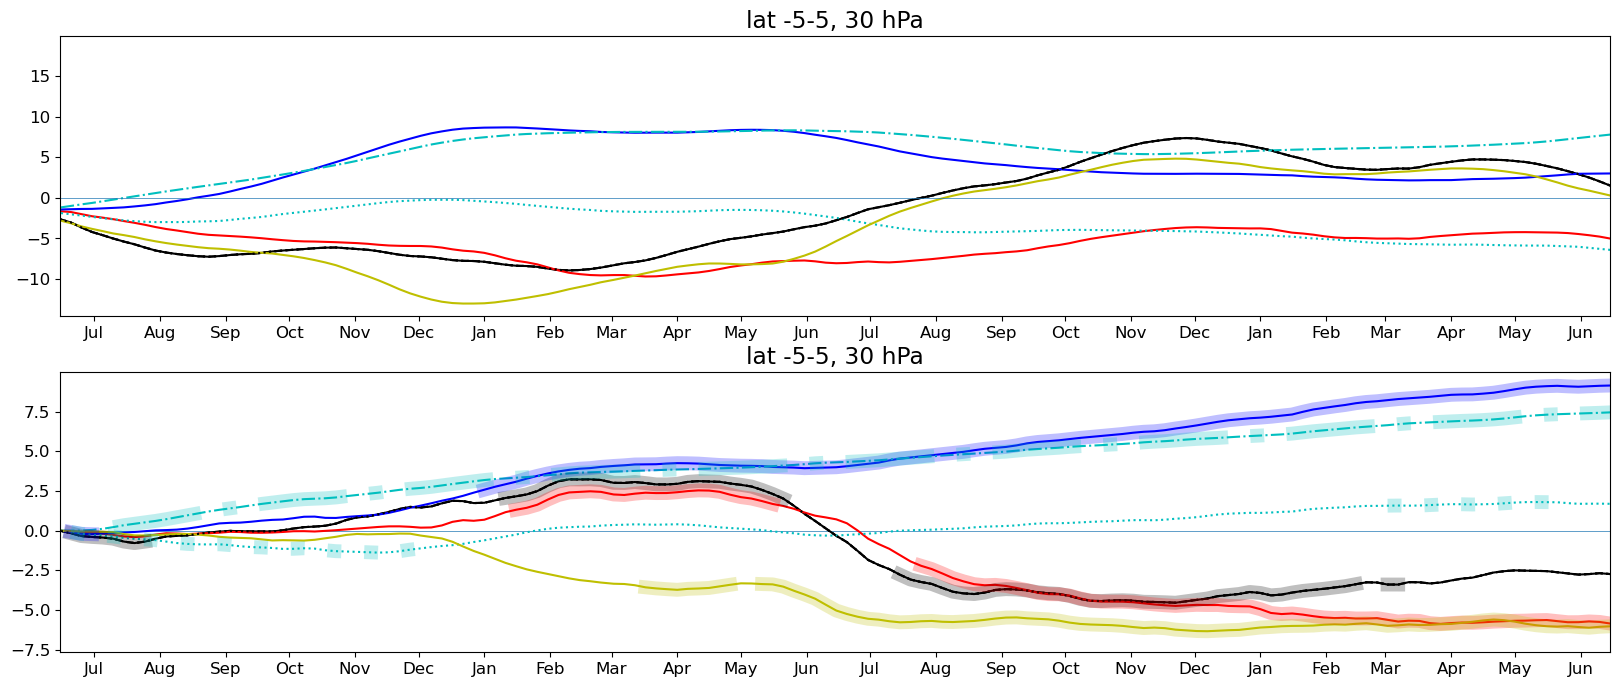

In [18]:
latmin, latmax = -5, 5
pres=30
importlib.reload(putil)

# ----- get tendencies
utend       = putil.get_daily_variable('UTEND', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendepfd   = putil.get_daily_variable('utendepfd', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendresvel = putil.get_daily_variable('UTRESVEL', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendvtem   = putil.get_daily_variable('utendvtem', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendwtem   = putil.get_daily_variable('utendwtem', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utenddiff   = putil.get_daily_variable('UTDIFF', latmin=latmin, latmax=latmax, skip_nosrctag=True)
# ----- get tendencies
utendint       = putil.get_daily_variable('UTEND_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendepfdint   = putil.get_daily_variable('UTEPFD_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendresvelint = putil.get_daily_variable('UTRESVEL_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendvtemint   = putil.get_daily_variable('UTVTEM_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utendwtemint   = putil.get_daily_variable('UTWTEM_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
utenddiffint   = putil.get_daily_variable('UTDIFF_INT', latmin=latmin, latmax=latmax, skip_nosrctag=True)
u              = putil.get_daily_variable('U', latmin=latmin, latmax=latmax, skip_nosrctag=True)

# ----- choose pressure level for analysis, get coords
parg = {'plev':pres, 'method':'nearest'}
time = putil.to_datetime(u['cfmean'].time)

# ----- make figure
fig  = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# ----- plot wind, integrated tendencies
uu     = u['cfmean'].sel(**parg)
uu0    = uu.isel(time=0)
ut     = fix(uu, utendint['cfmean'].sel(**parg))
utepfd = fix(uu, utendepfdint['cfmean'].sel(**parg))
utrv   = fix(uu, utendresvelint['cfmean'].sel(**parg))
utv    = fix(uu, utendvtemint['cfmean'].sel(**parg))
utw    = fix(uu, utendwtemint['cfmean'].sel(**parg))
utdf   = fix(uu, utenddiffint['cfmean'].sel(**parg))
# -- plot
ax1.plot(time, uu, '--k')
ax1.plot(time, ut, '-k')
ax1.plot(time, utepfd, '-r')
ax1.plot(time, utrv, '-b')
ax1.plot(time, utv, ':c')
ax1.plot(time, utw, '-.c')
ax1.plot(time, utdf, '-y')
ax1.plot(time, utdf+utrv+utepfd-2*uu0, ':k')
# -- format
putil.season_timeticks(ax1, time, 'month')
ax1.axhline(y=0, lw=0.5)
ax2.axhline(y=0, lw=0.5)

# ----- plot wind impact, integrated tendency impact
uui     = u['impact'].sel(**parg)
uui0    = uui.isel(time=0)
uti     = fix(uui, utendint['impact'].sel(**parg))
utepfdi = fix(uui, utendepfdint['impact'].sel(**parg))
utvi    = fix(uui, utendvtemint['impact'].sel(**parg))
utwi    = fix(uui, utendwtemint['impact'].sel(**parg))
utrvi   = fix(uui, utendresvelint['impact'].sel(**parg))
utdfi   = fix(uui, utenddiffint['impact'].sel(**parg))
# -- nan insignificant values
if(sigmode == 'pvalue'):
    uti_filt     = uti.where(utendint['pval'].sel(**parg) < pthresh)
    utepfdi_filt = utepfdi.where(utendepfdint['pval'].sel(**parg) < pthresh)
    utrvi_filt   = utrvi.where(utendresvelint['pval'].sel(**parg) < pthresh)
    utvi_filt    = utvi.where(utendvtemint['pval'].sel(**parg) < pthresh)
    utwi_filt    = utwi.where(utendwtemint['pval'].sel(**parg) < pthresh)
    utdfi_filt   = utdfi.where(utenddiffint['pval'].sel(**parg) < pthresh)
if(sigmode == 'coherence'):
    uti_filt     = uti.where(utendint['coherence'].sel(**parg) > cthresh)
    utepfdi_filt = utepfdi.where(utendepfdint['coherence'].sel(**parg) > cthresh)
    utrvi_filt   = utrvi.where(utendresvelint['coherence'].sel(**parg) > cthresh)
    utvi_filt    = utvi.where(utendvtemint['coherence'].sel(**parg) > cthresh)
    utwi_filt    = utwi.where(utendwtemint['coherence'].sel(**parg) > cthresh)
    utdfi_filt   = utdfi.where(utenddiffint['coherence'].sel(**parg) > cthresh)
# -- plot
ax2.plot(time, uui, '--k')
ax2.plot(time, uti, '-k')
ax2.plot(time, utepfdi, '-r')
ax2.plot(time, utrvi, '-b')
ax2.plot(time, utvi, ':c')
ax2.plot(time, utwi, '-.c')
ax2.plot(time, utdfi, '-y')
ax2.plot(time, utdfi+utrvi+utepfdi-2*uui0, ':k')
# --- plot significance
ax2.plot(time, uti_filt, '-k', **sigargs)
ax2.plot(time, utepfdi_filt, '-r', **sigargs)
ax2.plot(time, utrvi_filt, '-b', **sigargs)
ax2.plot(time, utvi_filt, ':c', **sigargs)
ax2.plot(time, utwi_filt, '-.c', **sigargs)
ax2.plot(time, utdfi_filt, '-y', **sigargs)
# -- format
putil.season_timeticks(ax2, time, 'month')

#ax1.set_ylim([-100, 100])
ax1.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax2.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax1.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
ax2.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))

plt.show()

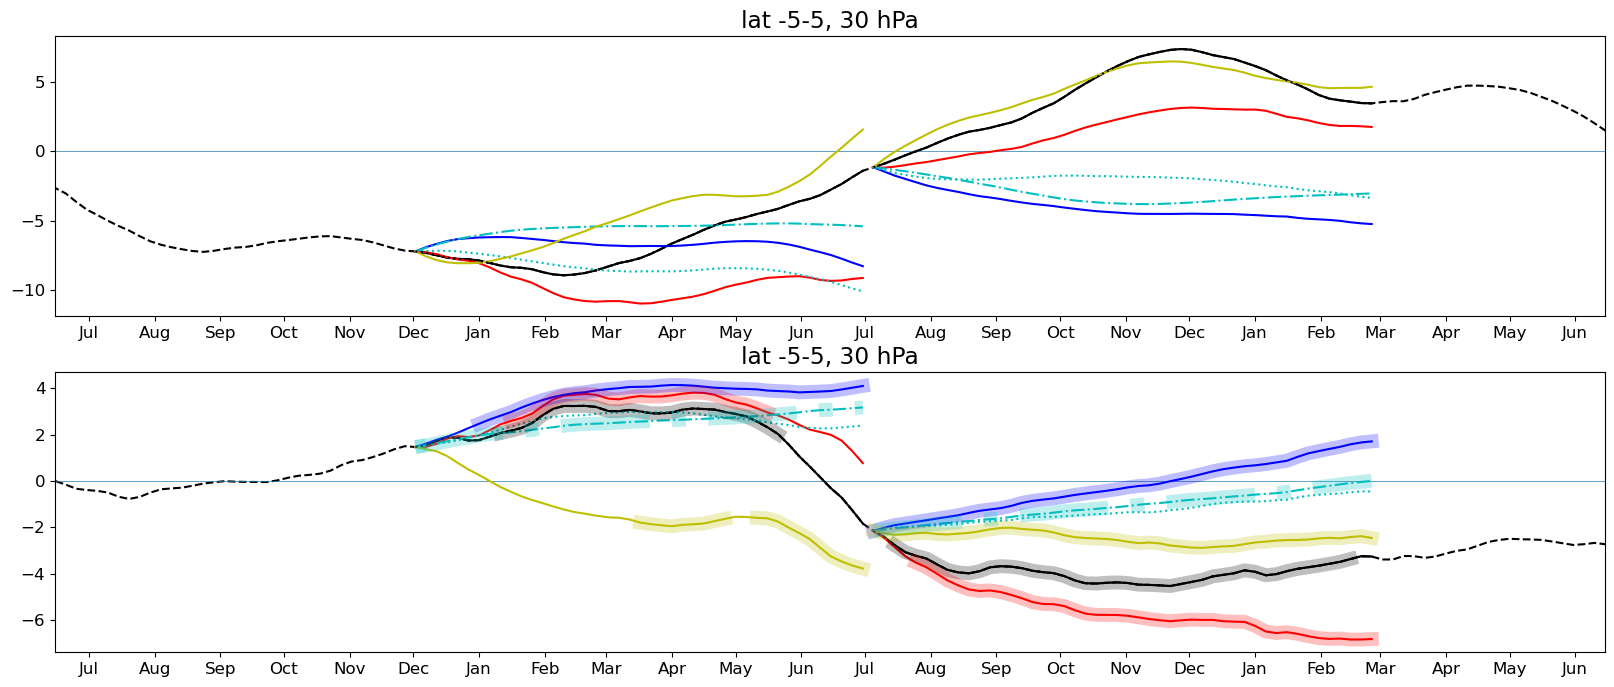

In [19]:
#  ---------------- same thing, but now for specific initialization times...
latmin, latmax = -5, 5
pres=30
stt = putil.shift_integrated_tendency
importlib.reload(putil)

# ----- choose pressure level for analysis, get coords
parg = {'plev':pres, 'method':'nearest'}
time = putil.to_datetime(u['cfmean'].time)
icd  = date(1991, 7, 1)
end  = date(1992, 6, 1)
dates = [[date(1991, 12, 1), date(1992, 7, 1)], 
         [date(1992, 7, 1), date(1993, 3, 1)]]

# ----- make figure
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
uu  = u['cfmean'].sel(**parg)
ax1.plot(time, uu, '--k')
putil.season_timeticks(ax1, time, 'month')
uui = u['impact'].sel(**parg)
ax2.plot(time, uui, '--k')
putil.season_timeticks(ax2, time, 'month')
ax1.axhline(y=0, lw=0.5)
ax2.axhline(y=0, lw=0.5)

for daterange in dates:
    icd, end = daterange[0], daterange[1]
    
    # ----- plot wind, integrated tendencies
    uu0    = uu.sel(time=slice(icd, end)).isel(time=0)
    ut     = stt(uu, utendint['cfmean'].sel(**parg), icd, end)
    utepfd = stt(uu, utendepfdint['cfmean'].sel(**parg), icd, end)
    utrv   = stt(uu, utendresvelint['cfmean'].sel(**parg), icd, end)
    utv    = stt(uu, utendvtemint['cfmean'].sel(**parg), icd, end)
    utw    = stt(uu, utendwtemint['cfmean'].sel(**parg), icd, end)
    utdf   = stt(uu, utenddiffint['cfmean'].sel(**parg), icd, end)
    # -- plot
    ax1.plot(ut.time, ut, '-k')
    ax1.plot(ut.time, utepfd, '-r')
    ax1.plot(ut.time, utrv, '-b')
    ax1.plot(ut.time, utv, ':c')
    ax1.plot(ut.time, utw, '-.c')
    ax1.plot(ut.time, utdf, '-y')
    # -- format
    ax1.plot(ut.time, utdf+utrv+utepfd-2*uu0, ':k')
    
    # ----- plot wind impact, integrated tendency impact
    uui0    = uui.sel(time=slice(icd, end)).isel(time=0)
    uti     = stt(uui, utendint['impact'].sel(**parg), icd, end)
    utepfdi = stt(uui, utendepfdint['impact'].sel(**parg), icd, end)
    utrvi   = stt(uui, utendresvelint['impact'].sel(**parg), icd, end)
    utvi    = stt(uui, utendvtemint['impact'].sel(**parg), icd, end)
    utwi    = stt(uui, utendwtemint['impact'].sel(**parg), icd, end)
    utdfi   = stt(uui, utenddiffint['impact'].sel(**parg), icd, end)
    # -- nan insignificant values
    if(sigmode == 'pvalue'):
        uti_filt     = uti.where(utendint['pval'].sel(**parg) < pthresh)
        utepfdi_filt = utepfdi.where(utendepfdint['pval'].sel(**parg) < pthresh)
        utrvi_filt   = utrvi.where(utendresvelint['pval'].sel(**parg) < pthresh)
        utvi_filt    = utvi.where(utendvtemint['pval'].sel(**parg) < pthresh)
        utwi_filt    = utwi.where(utendwtemint['pval'].sel(**parg) < pthresh)
        utdfi_filt   = utdfi.where(utenddiffint['pval'].sel(**parg) < pthresh)
    if(sigmode == 'coherence'):
        uti_filt     = uti.where(utendint['coherence'].sel(**parg) > cthresh)
        utepfdi_filt = utepfdi.where(utendepfdint['coherence'].sel(**parg) > cthresh)
        utrvi_filt   = utrvi.where(utendresvelint['coherence'].sel(**parg) > cthresh)
        utvi_filt    = utvi.where(utendvtemint['coherence'].sel(**parg) > cthresh)
        utwi_filt    = utwi.where(utendwtemint['coherence'].sel(**parg) > cthresh)
        utdfi_filt   = utdfi.where(utenddiffint['coherence'].sel(**parg) > cthresh)
    # -- plot
    ax2.plot(ut.time, uti, '-k')
    ax2.plot(ut.time, utepfdi, '-r')
    ax2.plot(ut.time, utrvi, '-b')
    ax2.plot(ut.time, utvi, ':c')
    ax2.plot(ut.time, utwi, '-.c')
    ax2.plot(ut.time, utdfi, '-y')
    ax2.plot(ut.time, utdfi+utrvi+utepfdi-2*uui0, ':k')
    # --- plot significance
    ax2.plot(ut.time, uti_filt, '-k', **sigargs)
    ax2.plot(ut.time, utepfdi_filt, '-r', **sigargs)
    ax2.plot(ut.time, utrvi_filt, '-b', **sigargs)
    ax2.plot(ut.time, utvi_filt, ':c', **sigargs)
    ax2.plot(ut.time, utwi_filt, '-.c', **sigargs)
    ax2.plot(ut.time, utdfi_filt, '-y', **sigargs)
    
#ax1.set_ylim([-100, 100])
ax1.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax2.set_xlim(date(1991, 6, 15), date(1993, 6, 15))
ax1.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))
ax2.set_title('lat {}-{}, {} hPa'.format(latmin, latmax, parg['plev']))

plt.show()

In [ ]:
# REASON THAT THE TERMS DONT ALIGN AT THE INITIAL STATE:
# the 10-day averaging "corrupts" the initial condition... for Utend it is fine, 
# since the time-averaged of the integrated Utend is just the time-averaged U
# But for the other terms... if they dip below U, then the IC willbe biased low, and vice versa...
# could find a way to massage this out... or try this procedure with the daily data...